In [11]:
import matplotlib.pyplot as plt
import pydicom as dicom
import matplotlib
import os, os.path
import imageio
import numpy as np

In [2]:
def file_names(directory_path, file_type):
    '''file path XXXX'''
    all_files = os.listdir(directory_path)
    file_names = [file for file in all_files if file.lower().endswith('.' + file_type)]
    return file_names

In [3]:
directory_path = 'manifest-1718402190360/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192'
file_type = 'dcm'

In [4]:
files = file_names(directory_path, file_type)
files.sort()
print(files)

['1-001.dcm', '1-002.dcm', '1-003.dcm', '1-004.dcm', '1-005.dcm', '1-006.dcm', '1-007.dcm', '1-008.dcm', '1-009.dcm', '1-010.dcm', '1-011.dcm', '1-012.dcm', '1-013.dcm', '1-014.dcm', '1-015.dcm', '1-016.dcm', '1-017.dcm', '1-018.dcm', '1-019.dcm', '1-020.dcm', '1-021.dcm', '1-022.dcm', '1-023.dcm', '1-024.dcm', '1-025.dcm', '1-026.dcm', '1-027.dcm', '1-028.dcm', '1-029.dcm', '1-030.dcm', '1-031.dcm', '1-032.dcm', '1-033.dcm', '1-034.dcm', '1-035.dcm', '1-036.dcm', '1-037.dcm', '1-038.dcm', '1-039.dcm', '1-040.dcm', '1-041.dcm', '1-042.dcm', '1-043.dcm', '1-044.dcm', '1-045.dcm', '1-046.dcm', '1-047.dcm', '1-048.dcm', '1-049.dcm', '1-050.dcm', '1-051.dcm', '1-052.dcm', '1-053.dcm', '1-054.dcm', '1-055.dcm', '1-056.dcm', '1-057.dcm', '1-058.dcm', '1-059.dcm', '1-060.dcm', '1-061.dcm', '1-062.dcm', '1-063.dcm', '1-064.dcm', '1-065.dcm', '1-066.dcm', '1-067.dcm', '1-068.dcm', '1-069.dcm', '1-070.dcm', '1-071.dcm', '1-072.dcm', '1-073.dcm', '1-074.dcm', '1-075.dcm', '1-076.dcm', '1-077.dcm'

In [5]:
from gudhi import CubicalComplex
import gudhi as gd

In [14]:
three_d_array = []
for file in files:
    filename=file.replace('.dcm', '') +'.png'
    image_path = '{}/{}'.format(directory_path,file)
    ds = dicom.dcmread(image_path)
    three_d_array.append(ds.pixel_array)
combined_array = np.stack(three_d_array, axis=1)
print(combined_array)

[[[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]]

 ...

 [[-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  [-1024 -1024 -1024 ... -1024 -1024 -1024]
  ...
  [-1024 -1024 -1024 ... -1024 -1024 -10

/Users/work/res_env/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")
/Users/work/res_env/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 3951001 intervals given as input, whereas max_intervals is set to 1000000.
  warnings.warn(


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

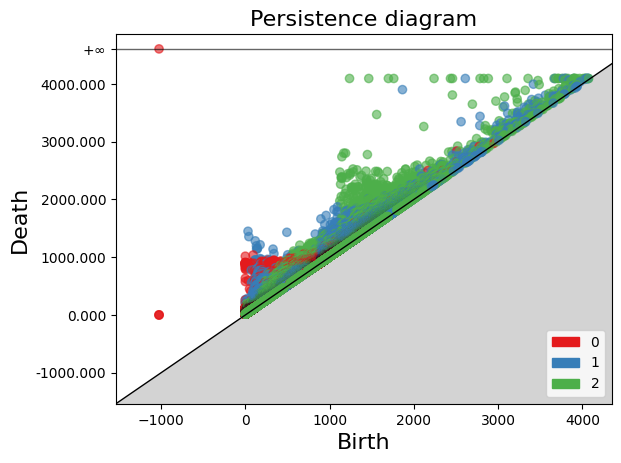

In [15]:
cc = CubicalComplex(top_dimensional_cells=combined_array)
persistence = cc.persistence()
gd.plot_persistence_diagram(persistence)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

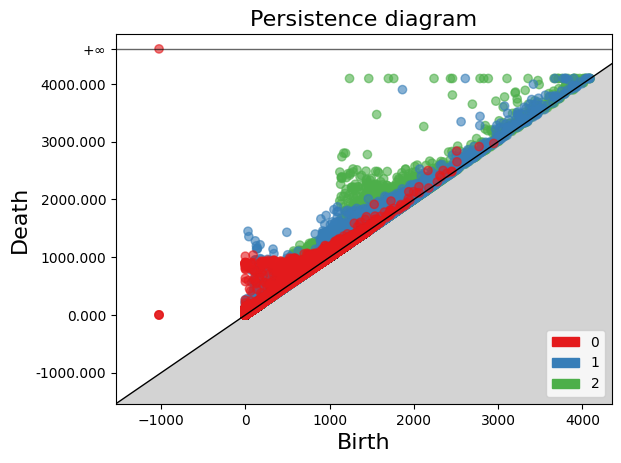

In [16]:
gd.plot_persistence_diagram(persistence, max_intervals=3951001)